In [343]:
import pandas as pd
import numpy as np 
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, Normalizer, scale
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from pandas_ml import ConfusionMatrix

In [344]:
train = pd.read_csv('creditcard.csv')
test = pd.read_csv('C:\\Users\\PRERNA PRERIT\\Desktop\\import-csv-nodejs-master\\public\\files\\input.csv')

In [345]:
print(len(train))
print(len(test))

284807
17


In [346]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [347]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [348]:
train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

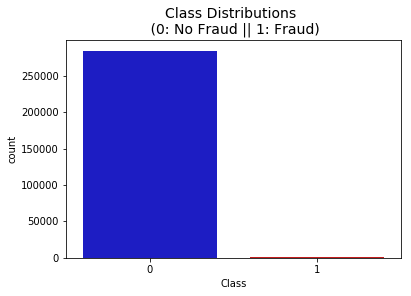

In [349]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data= train, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [350]:
print ("Fraud")
print (train.Time[train.Class == 1].describe())
print ()
print ("Normal")
print (train.Time[train.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


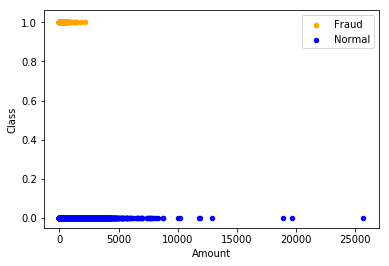

This feature looks important based on their distribution with respect to class.


In [351]:
frauds = train.loc[train['Class'] == 1]
non_frauds = train.loc[train['Class'] == 0]
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")

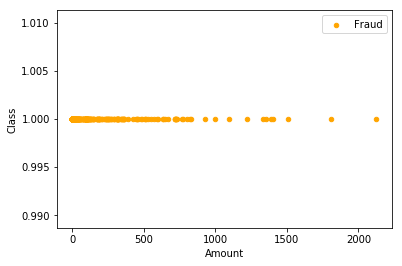

In [352]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

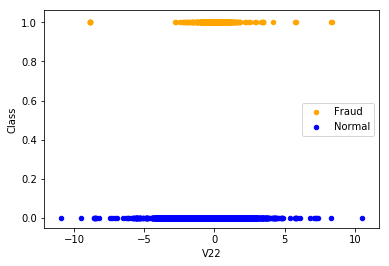

This feature may not be very important because of the similar distribution.


In [353]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

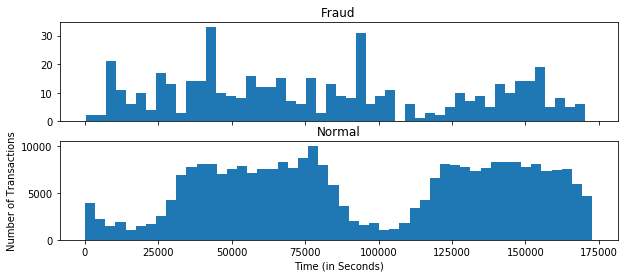

In [354]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

bins = 50

ax1.hist(train.Time[train.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(train.Time[train.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [355]:
print ("Fraud")
print (train.Amount[train.Class == 1].describe())
print ()
print ("Normal")
print (train.Amount[train.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


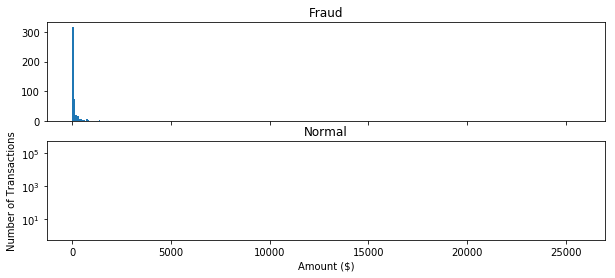

In [356]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

bins = 30

ax1.hist(train.Amount[train.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(train.Amount[train.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


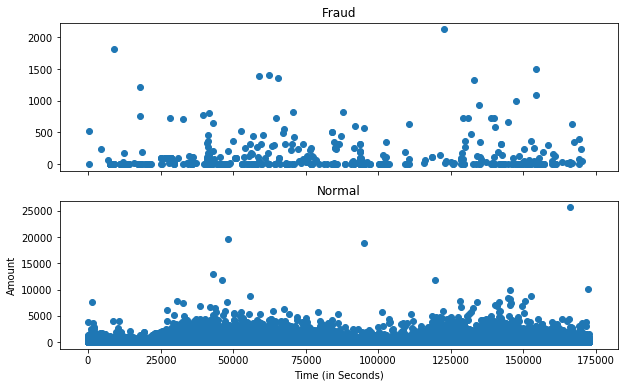

In [357]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,6))

ax1.scatter(train.Time[train.Class == 1], train.Amount[train.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(train.Time[train.Class == 0], train.Amount[train.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


In [358]:
v_features = train.iloc[:,1:29].columns

In [359]:
v_features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

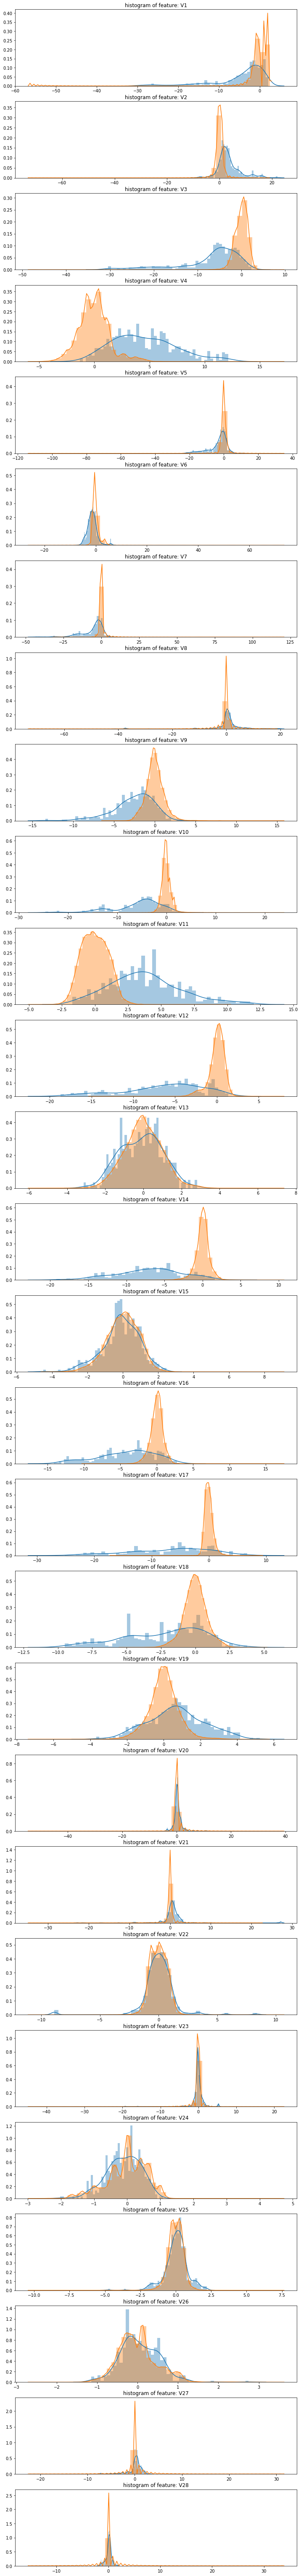

In [360]:
fig = plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(train[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train[cn][train.Class == 1], bins=50)
    sns.distplot(train[cn][train.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [376]:
Xtrain, Ytrain = np.split(train, [-1], axis=1)
Xtest, Ytrue = np.split(test, [-1], axis=1)
print(Xtest)
print(Ytrue)

        Time        V1        V2        V3        V4        V5        V6  \
0       10.0  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
1       15.0  1.492936 -1.029346  0.454795 -1.438026 -1.555434 -0.720961   
2       18.0  1.166616  0.502120 -0.067300  2.261569  0.428804  0.089474   
3       67.0 -1.494668  0.837241  2.628211  3.145414 -0.609098  0.258495   
4       68.0  1.232996  0.189454  0.491040  0.633673 -0.511574 -0.990609   
5       68.0  1.156939  0.037215  0.556799  0.519507 -0.479754 -0.352714   
6       68.0 -0.770196  0.483572  1.901072 -0.001876  0.024245 -1.171903   
7       69.0  0.298503  2.142722 -1.542143  1.561332  0.938108 -2.145673   
8       69.0 -0.608027  0.306694  1.473004  1.191127  0.021265  0.888442   
9       69.0 -1.766645  2.352984 -0.009955 -0.363736  1.460953 -0.204833   
10      69.0 -2.220642  1.029181 -0.697724 -1.268226  2.802221  3.322901   
11      70.0 -0.426072 -0.060304  2.220828  0.024742 -0.584964  0.460623   
12      71.0

In [377]:
scaler = StandardScaler()
Xtrain['Amount'] = scaler.fit_transform(Xtrain['Amount'].values.reshape(-1,1))

In [378]:
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['avg / total'] = avg

    return class_report_df.T

In [379]:
#decision Tree Classifier
clf = DecisionTreeClassifier()

In [380]:
clf.fit(Xtrain, Ytrain.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [381]:
ytest_pred = clf.predict(Xtest)
ytrain_pred = clf.predict(Xtrain)

In [382]:
clf.score(Xtest, ytest_pred)

1.0

In [384]:
confusion_matrix(Ytrue, ytest_pred)

TypeError: 'BinaryConfusionMatrix' object is not callable

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False         10     2       12
True           1     4        5
__all__       11     6       17


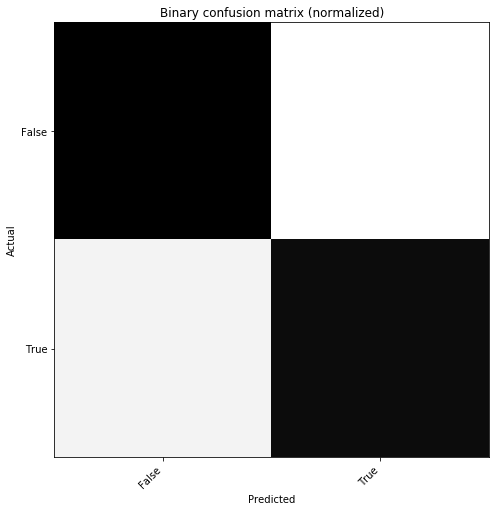

population: 17
P: 5
N: 12
PositiveTest: 6
NegativeTest: 11
TP: 4
TN: 10
FP: 2
FN: 1
TPR: 0.8
TNR: 0.833333333333
PPV: 0.666666666667
NPV: 0.909090909091
FPR: 0.166666666667
FDR: 0.333333333333
FNR: 0.2
ACC: 0.823529411765
F1_score: 0.727272727273
MCC: 0.603859639856
informedness: 0.633333333333
markedness: 0.575757575758
prevalence: 0.294117647059
LRP: 4.8
LRN: 0.24
DOR: 20.0
FOR: 0.0909090909091


In [385]:
confusion_matrix = ConfusionMatrix(Ytrue.values.ravel(), ytest_pred)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [386]:
import pydotplus
dot_data = export_graphviz(clf, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("DT3.pdf")

True

In [387]:
print(classification_report(y_true= Ytrue, y_pred=ytest_pred, digits=6))

             precision    recall  f1-score   support

        0.0   0.909091  0.833333  0.869565        12
        1.0   0.666667  0.800000  0.727273         5

avg / total   0.837790  0.823529  0.827714        17



In [388]:
df_class_report = pandas_classification_report(y_true=Ytrue, y_pred=ytest_pred)
print(df_class_report)
df_class_report.to_csv('classDT.csv',  sep=',')

             precision    recall  f1-score  support
0             0.909091  0.833333  0.869565     12.0
1             0.666667  0.800000  0.727273      5.0
avg / total   0.837790  0.823529  0.827714     17.0


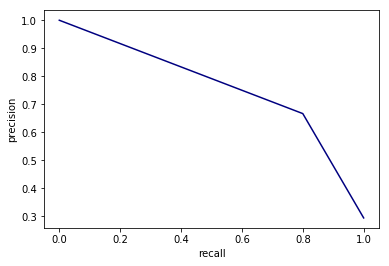

In [389]:
y_test_pred = clf.predict_proba(Xtest)
precision, recall, thresholds = precision_recall_curve(Ytrue, y_test_pred[:,1])
plt.plot(recall, precision, color='navy', label='Precision-Recall curve')
plt.ylabel('precision')
plt.xlabel('recall')
plt.show()

In [390]:
df = pd.DataFrame({'Class':ytest_pred, 'MerchantCategoryCode' : Xtest['V1'] ,'TransactionTime' : Xtest['V2'],
                  'Transactionstatus' : Xtest['V3'], 'TransactionPlace' : Xtest['V4'], 'TransactionType' : Xtest['V5'],
                  'customeridentification' : Xtest['V6'], 'BANK' : Xtest['V7']})
df.head()

,Class,MerchantCategoryCode,TransactionTime,Transactionstatus,TransactionPlace,TransactionType,customeridentification,BANK
0,0.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405
1,0.0,1.492936,-1.029346,0.454795,-1.438026,-1.555434,-0.720961,-1.080664
2,0.0,1.166616,0.502120,-0.067300,2.261569,0.428804,0.089474,0.241147
3,0.0,-1.494668,0.837241,2.628211,3.145414,-0.609098,0.258495,-0.012189
4,0.0,1.232996,0.189454,0.491040,0.633673,-0.511574,-0.990609,0.066240


In [391]:
clf.score(Xtest,ytest_pred)

1.0

In [392]:
clf.score(Xtrain,Ytrain)

1.0

In [393]:
def getMerchantCategoryCode(float):
    if float >= 2.5:
        return "MERC1"
    elif float >= 2 and float < 2.5:
        return "MERC2"
    elif float >= 2 and float < 2.5:
        return "MERC3"
    elif float >= 1.5 and float < 2:
        return "MERC4"
    elif float >= 1 and float < 1.5:
        return "MERC5"
    elif float >= 0 and float < 1:
        return "MERC6"
    elif float >= -1 and float < 0:
        return "MERC7"
    elif float >= -2 and float < -1:
        return "MERC8"
    else:
        return "MERC9"
        
df['MerchantCategoryCode'] = df['MerchantCategoryCode'].apply(getMerchantCategoryCode)
print(df['MerchantCategoryCode'])

0     MERC5
1     MERC5
2     MERC5
3     MERC8
4     MERC5
5     MERC5
6     MERC7
7     MERC6
8     MERC7
9     MERC8
10    MERC9
11    MERC7
12    MERC5
13    MERC9
14    MERC9
15    MERC6
16    MERC7
Name: MerchantCategoryCode, dtype: object


In [394]:
import math
def getTransactionTime(float):
    return (float) * (float)
    
        
df['TransactionTime'] = df['TransactionTime'].apply(getTransactionTime)
print(df['TransactionTime'])

0      1.492396
1      1.059553
2      0.252125
3      0.700973
4      0.035893
5      0.001385
6      0.233842
7      4.591255
8      0.094061
9      5.536535
10     1.059213
11     0.003637
12     0.336356
13     2.287971
14     2.549846
15    10.952031
16    22.090520
Name: TransactionTime, dtype: float64


In [395]:
def getTransactionstatus(float):
    if float >= 0:
        return "Success"
    elif float >= 0.9 and float < 0:
        return "Still_Processsing"
    else:
        return "Failure"
        
df['Transactionstatus'] = df['Transactionstatus'].apply(getTransactionstatus)
print(df['Transactionstatus'])

0     Success
1     Success
2     Failure
3     Success
4     Success
5     Success
6     Success
7     Failure
8     Success
9     Failure
10    Failure
11    Success
12    Success
13    Failure
14    Failure
15    Failure
16    Failure
Name: Transactionstatus, dtype: object


In [396]:
def getTransactionPlace(float):
    if float >= 2.5:
        return "Delhi"
    elif float >= 2 and float < 2.5:
        return "Lucknow"
    elif float >= 2 and float < 2.5:
        return "Hyderabad"
    elif float >= 1.5 and float < 2:
        return "Chennai"
    elif float >= 1 and float < 1.5:
        return "Banglore"
    elif float >= 0 and float < 1:
        return "Kerela"
    elif float >= -1 and float < 0:
        return "Sikkim"
    elif float >= -2 and float < -1:
        return "J&K"
    else:
        return "Punjab"
        
df['TransactionPlace'] = df['TransactionPlace'].apply(getTransactionPlace)
print(df['TransactionPlace'])

0          J&K
1          J&K
2      Lucknow
3        Delhi
4       Kerela
5       Kerela
6       Sikkim
7      Chennai
8     Banglore
9       Sikkim
10         J&K
11      Kerela
12      Sikkim
13     Chennai
14       Delhi
15       Delhi
16       Delhi
Name: TransactionPlace, dtype: object


In [397]:
def getTransactionType(float):
    if float >= 2.5:
        return "PayPal"
    elif float >= 2 and float < 2.5:
        return "Paytm"
    elif float >= 2 and float < 2.5:
        return "Mobiquik"
    elif float >= 1.5 and float < 2:
        return "CreditCard"
    elif float >= 1 and float < 1.5:
        return "DebitCard"
    elif float >= 0 and float < 1:
        return "EWallet"
    elif float >= -1 and float < 0:
        return "NetBanking"
    elif float >= -2 and float < -1:
        return "EBanking"
    else:
        return "AmazonPay"
        
df['TransactionType'] = df['TransactionType'].apply(getTransactionType)
print(df['TransactionType'])

0       EBanking
1       EBanking
2        EWallet
3     NetBanking
4     NetBanking
5     NetBanking
6        EWallet
7        EWallet
8        EWallet
9      DebitCard
10        PayPal
11    NetBanking
12    NetBanking
13       EWallet
14      EBanking
15    NetBanking
16       EWallet
Name: TransactionType, dtype: object


In [398]:
def getcustomeridentification(float):
    if float >= 2.5:
        return math.floor(float * 2.5)
    elif float >= 2 and float < 2.5:
        return math.floor(float * 2)
    elif float >= 2 and float < 2.5:
        return math.floor(float * 1)
    elif float >= 1.5 and float < 2:
        return math.floor(float * 3)
    elif float >= 1 and float < 1.5:
        return math.floor(float * 5)
    elif float >= 0 and float < 1:
        return math.floor(float * 7)
    elif float >= -1 and float < 0:
        return math.floor(float * 9)
    elif float >= -2 and float < -1:
        return math.floor(float * 6)
    else:
        return math.floor(float * 1.1)
        
df['customeridentification'] = df['customeridentification'].apply(getcustomeridentification)
print(df['customeridentification'])

0    -7
1    -7
2     0
3     1
4    -9
5    -4
6    -8
7    -3
8     6
9    -2
10    8
11    3
12   -1
13   -3
14   -8
15   -3
16   -3
Name: customeridentification, dtype: int64


In [399]:
def getBANK(float):
    if float >= 2.5:
        return "Federal"
    elif float >= 2 and float < 2.5:
        return "HDFC"
    elif float >= 2 and float < 2.5:
        return "BOB"
    elif float >= 1.5 and float < 2:
        return "BOI"
    elif float >= 1 and float < 1.5:
        return "SBI"
    elif float >= 0 and float < 1:
        return "Corporation"
    elif float >= -1 and float < 0:
        return "PNB"
    elif float >= -2 and float < -1:
        return "Canara"
    else:
        return "ICICI"
        
df['BANK'] = df['BANK'].apply(getBANK)
print(df['BANK'])

0             PNB
1          Canara
2     Corporation
3             PNB
4     Corporation
5             PNB
6     Corporation
7             SBI
8             SBI
9     Corporation
10    Corporation
11            PNB
12            PNB
13            PNB
14            PNB
15          ICICI
16          ICICI
Name: BANK, dtype: object


In [400]:
df_class_report.to_csv('ReportDT.csv',  sep=',')

In [401]:
df.to_csv("C:\\Users\\PRERNA PRERIT\\Desktop\\import-csv-nodejs-master\\public\\files\\output.csv")

In [402]:
#random Forest Classifier
clfRF = RandomForestClassifier(max_depth = 6, random_state=0)
clfRF.fit(Xtrain, Ytrain.values.ravel())
clfRF.score(Xtrain,Ytrain.values.ravel()),clfRF.score(Xtest,Ytrue)

(0.99955057284406634, 0.94117647058823528)

In [403]:
y_train_pred = clfRF.predict(Xtrain)
y_test_pred = clfRF.predict(Xtest)

In [404]:
#confusion_matrix(Ytrain.values.ravel(), y_train_pred)

In [405]:
#confusion_matrix(Ytrue, y_test_pred)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False         12     0       12
True           1     4        5
__all__       13     4       17


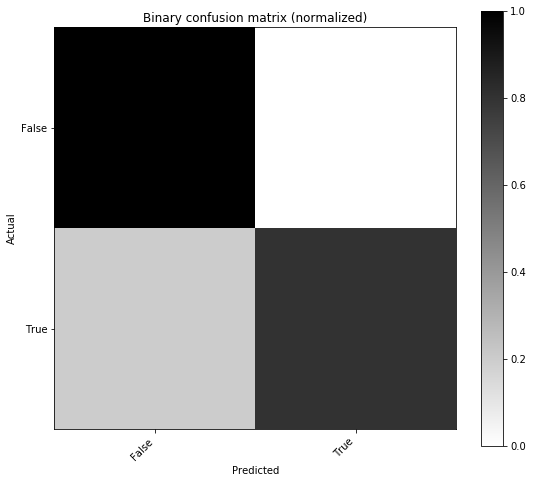

population: 17
P: 5
N: 12
PositiveTest: 4
NegativeTest: 13
TP: 4
TN: 12
FP: 0
FN: 1
TPR: 0.8
TNR: 1.0
PPV: 1.0
NPV: 0.923076923077
FPR: 0.0
FDR: 0.0
FNR: 0.2
ACC: 0.941176470588
F1_score: 0.888888888889
MCC: 0.859337848847
informedness: 0.8
markedness: 0.923076923077
prevalence: 0.294117647059
LRP: inf
LRN: 0.2
DOR: inf
FOR: 0.0769230769231


C:\Users\PRERNA PRERIT\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:332: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


In [406]:
confusion_matrix = ConfusionMatrix(Ytrue.values.ravel(), y_test_pred)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [407]:
print(classification_report(y_true=Ytrue, y_pred=y_test_pred, digits=6))

             precision    recall  f1-score   support

        0.0   0.923077  1.000000  0.960000        12
        1.0   1.000000  0.800000  0.888889         5

avg / total   0.945701  0.941176  0.939085        17



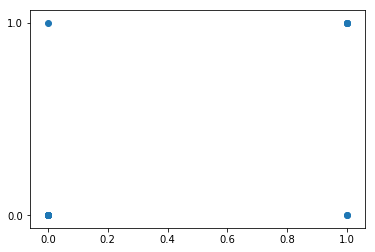

1.0

In [408]:
#for decision tree
plt.scatter(ytest_pred,Ytrue)
plt.show()
clf.score(Xtest,ytest_pred)

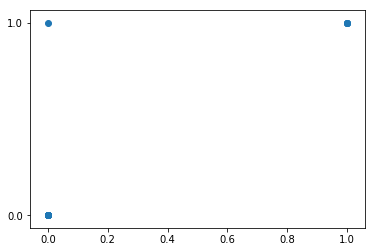

1.0

In [409]:
#for random Forest
plt.scatter(y_test_pred,Ytrue)
plt.show()
clfRF.score(Xtest,y_test_pred)

In [410]:
precision_1, recall_1, thresholds_1 = precision_recall_curve(Ytrue, ytest_pred)

In [411]:
precision_2, recall_2, thresholds_2 = precision_recall_curve(Ytrue, y_test_pred)

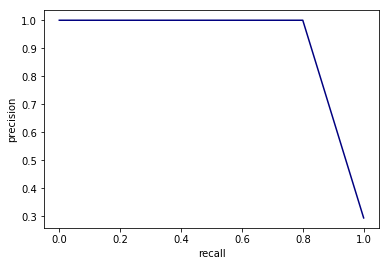

In [412]:
#for decision tree
plt.plot(recall_1, precision_2, color='navy', label='Precision-Recall curve')
plt.ylabel('precision')
plt.xlabel('recall')
plt.show()

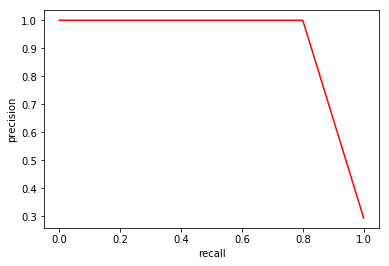

In [413]:
#for random forest
plt.plot(recall_2, precision_2, color='red', label='Precision-Recall curve')
plt.ylabel('precision')
plt.xlabel('recall')
plt.show()

In [342]:
print(recall_2 - recall_1)

NameError: name 'recall_2' is not defined